In [1]:
import sys
sys.path.append("..")
import os
#GPU configuration
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data_generator as data_generator
import scripts.feature_ranking as feature_ranking
import scripts.features_2d as features_2d
import scripts.ga as ga
import scripts.cnn_models as cnn_models
import scripts.ga_evaluation as ga_evaluation
from IPython import get_ipython
from keras.backend.tensorflow_backend import set_session
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from tqdm import tqdm
import seaborn as sns
plt.ion()
plt.show()

random_state=4
random.seed( random_state )
np.random.seed(random_state)

%load_ext autoreload
%autoreload 2

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


>> std 6
generating ../data/GA/nonisotropic_GA_gmm_6_3.pkl ...
COV 0.7 
ARI  1.0, std 6


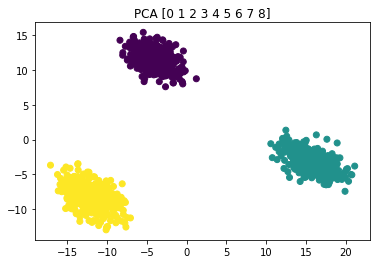

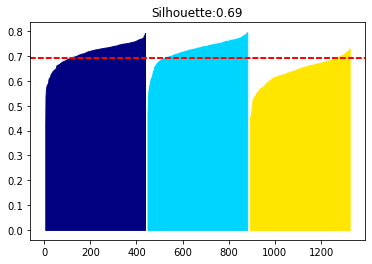

COV 0.7 
ARI  1.0, std 6


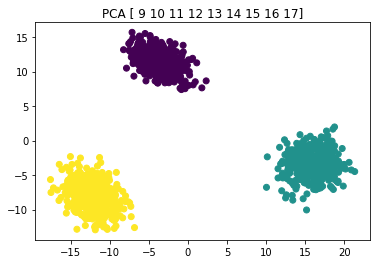

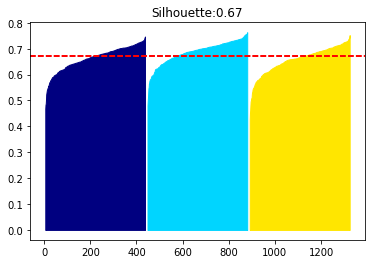

COV 0.7 
ARI  1.0, std 6


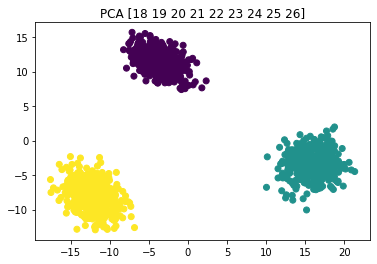

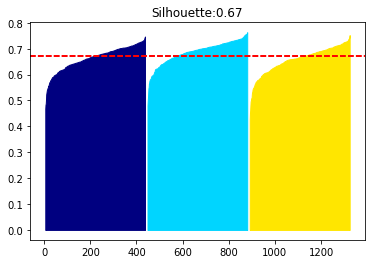

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.26 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.46 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.05 sec
Handle redundant features 0.01 sec
Returning 0 redundant features and  16 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [00:42<02:56, 10.37s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.28,"[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.55,0.305249,0.76,11.0,"Counter({0: 434, 2: 433, 1: 433})"


adding 48 random population


 38%|███▊      | 8/21 [01:53<02:42, 12.53s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.28,"[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.55,0.305249,0.76,11.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.22,"[0, 2, 9, 11, 18]","[1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.21,0.268244,0.42,5.0,"Counter({1: 487, 0: 433, 2: 380})"


adding 25 random population


 57%|█████▋    | 12/21 [02:27<01:18,  8.69s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.28,"[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.55,0.305249,0.76,11.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.22,"[0, 2, 9, 11, 18]","[1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.21,0.268244,0.42,5.0,"Counter({1: 487, 0: 433, 2: 380})"
2,0.20,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, ...",0.18,0.298749,0.60,2.0,"Counter({2: 443, 1: 440, 0: 417})"


adding 10 random population


 76%|███████▌  | 16/21 [03:01<00:44,  8.87s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.28,"[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.55,0.305249,0.76,11.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.22,"[0, 2, 9, 11, 18]","[1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.21,0.268244,0.42,5.0,"Counter({1: 487, 0: 433, 2: 380})"
2,0.20,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, ...",0.18,0.298749,0.60,2.0,"Counter({2: 443, 1: 440, 0: 417})"
3,0.20,"[13, 22]","[1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, ...",0.14,0.296927,0.58,2.0,"Counter({1: 434, 0: 433, 2: 433})"


adding 12 random population


 95%|█████████▌| 20/21 [03:28<00:06,  6.57s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.28,"[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.55,0.305249,0.76,11.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.22,"[0, 2, 9, 11, 18]","[1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.21,0.268244,0.42,5.0,"Counter({1: 487, 0: 433, 2: 380})"
2,0.20,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, ...",0.18,0.298749,0.60,2.0,"Counter({2: 443, 1: 440, 0: 417})"
3,0.20,"[13, 22]","[1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, ...",0.14,0.296927,0.58,2.0,"Counter({1: 434, 0: 433, 2: 433})"
4,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.265357,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"


adding 1 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 16
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:24<01:49,  6.44s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"


adding 50 random population


 38%|███▊      | 8/21 [02:13<03:18, 15.27s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"


adding 17 random population


 57%|█████▋    | 12/21 [02:37<01:09,  7.70s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"
2,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"


adding 2 random population


 76%|███████▌  | 16/21 [02:58<00:28,  5.63s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"
2,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
3,0.14,"[100, 139]","[0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, ...",0.14,0.40,2.0,"Counter({0: 503, 2: 427, 1: 370})"


adding 1 random population


 95%|█████████▌| 20/21 [03:19<00:05,  5.11s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"
2,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
3,0.14,"[100, 139]","[0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, ...",0.14,0.40,2.0,"Counter({0: 503, 2: 427, 1: 370})"
4,0.14,"[72, 96]","[2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, ...",0.15,0.39,2.0,"Counter({1: 471, 2: 448, 0: 381})"


adding 2 random population


100%|██████████| 21/21 [03:26<00:00,  9.84s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.62,0.67,24.0,"Counter({0: 434, 2: 433, 1: 433})"
1,0.18,"[10, 19]","[2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, ...",0.12,0.51,2.0,"Counter({1: 687, 0: 361, 2: 252})"
2,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
3,0.14,"[100, 139]","[0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, ...",0.14,0.40,2.0,"Counter({0: 503, 2: 427, 1: 370})"
4,0.14,"[72, 96]","[2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, ...",0.15,0.39,2.0,"Counter({1: 471, 2: 448, 0: 381})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [01:08<04:40, 16.51s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.21,"[8, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.27,0.83,2.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 21 random population


 38%|███▊      | 8/21 [02:27<03:54, 18.04s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.21,"[8, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.27,0.83,2.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.27,"[5, 7, 14, 16, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.43,0.78,6.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 48 random population


 57%|█████▋    | 12/21 [03:59<02:54, 19.41s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.21,"[8, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.27,0.83,2.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.27,"[5, 7, 14, 16, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.43,0.78,6.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.23,"[2, 4, 15, 20, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.30,0.65,6.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 22 random population


 76%|███████▌  | 16/21 [05:22<01:31, 18.40s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.21,"[8, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.27,0.83,2.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.27,"[5, 7, 14, 16, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.43,0.78,6.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.23,"[2, 4, 15, 20, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.30,0.65,6.0,"Counter({0: 434, 1: 433, 2: 433})"
3,0.19,"[9, 18]","[1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, ...",0.13,0.56,2.0,"Counter({0: 467, 1: 433, 2: 400})"


adding 1 random population


 95%|█████████▌| 20/21 [06:40<00:17, 17.44s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.21,"[8, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.27,0.83,2.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.27,"[5, 7, 14, 16, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.43,0.78,6.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.23,"[2, 4, 15, 20, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.30,0.65,6.0,"Counter({0: 434, 1: 433, 2: 433})"
3,0.19,"[9, 18]","[1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, ...",0.13,0.56,2.0,"Counter({0: 467, 1: 433, 2: 400})"
4,0.18,"[0, 13]","[1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, ...",0.14,0.54,2.0,"Counter({0: 456, 1: 432, 2: 412})"


adding 9 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [01:12<05:03, 17.88s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.27,0.656571,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.62,0.69,21.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 50 random population


 38%|███▊      | 8/21 [03:16<04:55, 22.72s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.27,0.656571,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.62,0.69,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.10,0.275571,"[168, 254]","[2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.14,0.41,2.0,"Counter({2: 444, 1: 437, 0: 419})"


adding 4 random population


 57%|█████▋    | 12/21 [04:28<02:43, 18.19s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.27,0.656571,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.62,0.69,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.10,0.275571,"[168, 254]","[2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.14,0.41,2.0,"Counter({2: 444, 1: 437, 0: 419})"
2,0.19,0.366487,"[12, 21]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, ...",0.12,0.55,2.0,"Counter({1: 483, 2: 448, 0: 369})"


adding 6 random population


 76%|███████▌  | 16/21 [05:40<01:24, 16.88s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.27,0.656571,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.62,0.69,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.10,0.275571,"[168, 254]","[2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.14,0.41,2.0,"Counter({2: 444, 1: 437, 0: 419})"
2,0.19,0.366487,"[12, 21]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, ...",0.12,0.55,2.0,"Counter({1: 483, 2: 448, 0: 369})"
3,0.10,0.281746,"[174, 316]","[0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, ...",0.13,0.42,2.0,"Counter({2: 493, 0: 408, 1: 399})"


adding 1 random population


 95%|█████████▌| 20/21 [06:48<00:16, 16.09s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.27,0.656571,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.62,0.69,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.10,0.275571,"[168, 254]","[2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.14,0.41,2.0,"Counter({2: 444, 1: 437, 0: 419})"
2,0.19,0.366487,"[12, 21]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, ...",0.12,0.55,2.0,"Counter({1: 483, 2: 448, 0: 369})"
3,0.10,0.281746,"[174, 316]","[0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, ...",0.13,0.42,2.0,"Counter({2: 493, 0: 408, 1: 399})"
4,0.10,0.274863,"[138, 248]","[2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, ...",0.14,0.41,2.0,"Counter({1: 470, 0: 463, 2: 367})"


adding 2 random population


100%|██████████| 21/21 [07:14<00:00, 20.68s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,gmm_ratkowsky_lance_3_pop2,0,0,0.444444,0.250000,7,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[0, 1, 2, 3, 6]",1.0,1.0,3,3
1,gmm_ratkowsky_lance_3_pop2,1,0,0.333333,0.176471,8,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[9, 10, 11, 12, 13, 15]",1.0,1.0,3,3
2,gmm_ratkowsky_lance_3_pop2,2,0,0.444444,0.250000,7,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[4, 5, 7, 8, 14, 16, 17, 20, 23, 25, 26]","[18, 19, 21, 22, 24]",1.0,1.0,3,3
3,gmm_adapted_ratkowsky_lance_3_pop2,0,0,1.000000,0.375000,15,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",[],1.0,1.0,3,3
4,gmm_adapted_ratkowsky_lance_3_pop2,1,0,0.888889,0.320000,16,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",[10],1.0,1.0,3,3
5,gmm_adapted_ratkowsky_lance_3_pop2,2,0,0.777778,0.269231,17,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[19, 21]",1.0,1.0,3,3
6,gmm_silhouette_3_pop3,0,1,0.222222,0.153846,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[5, 7, 14, 16, 17, 26]","[0, 1, 2, 3, 4, 6, 8]",1.0,1.0,3,3
7,gmm_silhouette_3_pop3,0,2,0.222222,0.153846,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 4, 15, 20, 23, 24]","[0, 1, 3, 5, 6, 7, 8]",1.0,1.0,3,3
8,gmm_silhouette_3_pop3,1,1,0.333333,0.250000,3,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[5, 7, 14, 16, 17, 26]","[9, 10, 11, 12, 13, 15]",1.0,1.0,3,3
9,gmm_silhouette_3_pop3,2,2,0.333333,0.250000,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 4, 15, 20, 23, 24]","[18, 19, 21, 22, 25, 26]",1.0,1.0,3,3


generating ../data/GA/nonisotropic_GA_gmm_6_6.pkl ...
COV 0.7 
ARI  1.0, std 6


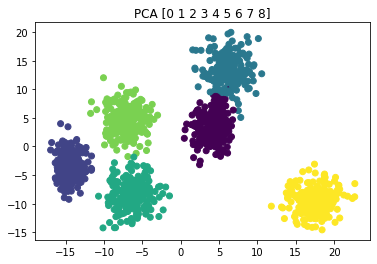

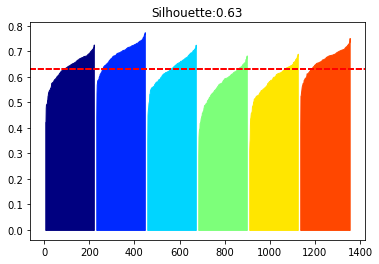

COV 0.7 
ARI  1.0, std 6


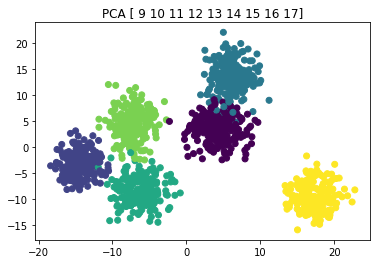

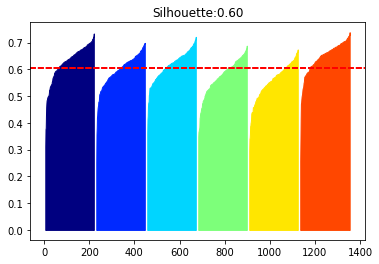

COV 0.7 
ARI  1.0, std 6


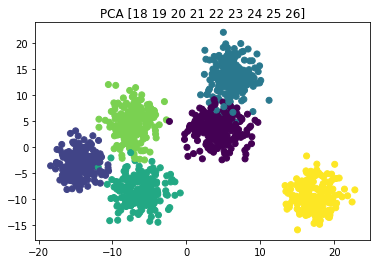

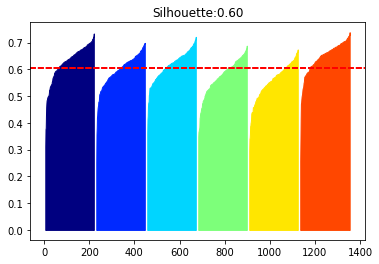

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.14 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.39 sec
KNN computation 0.01 sec
Sorting and thresholds 0.01 sec
Performing hierarchical clustering...
Hierarchical clustering 0.04 sec
Handle redundant features 0.01 sec
Returning 1 redundant features and  12 important features
*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 12
adding 50 random population


 19%|█▉        | 4/21 [00:29<02:02,  7.18s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.14,"[1, 2, 7, 8, 11, 16, 17, 25, 26]","[2, 1, 4, 5, 3, 3, 3, 4, 0, 1, 5, 5, 3, 0, 4, ...",0.3,0.152926,0.58,9.0,"Counter({2: 220, 0: 217, 1: 216, 4: 216, 3: 21..."


adding 40 random population


 38%|███▊      | 8/21 [01:49<02:45, 12.71s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.14,"[1, 2, 7, 8, 11, 16, 17, 25, 26]","[2, 1, 4, 5, 3, 3, 3, 4, 0, 1, 5, 5, 3, 0, 4, ...",0.30,0.152926,0.58,9.0,"Counter({2: 220, 0: 217, 1: 216, 4: 216, 3: 21..."
1,0.12,"[4, 13, 22]","[2, 2, 1, 3, 2, 4, 1, 1, 3, 1, 2, 3, 4, 5, 4, ...",0.15,0.154398,0.35,3.0,"Counter({4: 375, 1: 300, 2: 177, 5: 172, 3: 14..."


adding 15 random population


 57%|█████▋    | 12/21 [02:25<01:23,  9.25s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.14,"[1, 2, 7, 8, 11, 16, 17, 25, 26]","[2, 1, 4, 5, 3, 3, 3, 4, 0, 1, 5, 5, 3, 0, 4, ...",0.30,0.152926,0.58,9.0,"Counter({2: 220, 0: 217, 1: 216, 4: 216, 3: 21..."
1,0.12,"[4, 13, 22]","[2, 2, 1, 3, 2, 4, 1, 1, 3, 1, 2, 3, 4, 5, 4, ...",0.15,0.154398,0.35,3.0,"Counter({4: 375, 1: 300, 2: 177, 5: 172, 3: 14..."
2,0.12,"[3, 6, 12, 15, 20, 24, 331]","[3, 2, 4, 5, 1, 1, 1, 4, 0, 2, 5, 5, 1, 0, 4, ...",0.18,0.138401,0.39,7.0,"Counter({3: 221, 2: 216, 4: 216, 1: 216, 0: 21..."


adding 7 random population


 76%|███████▌  | 16/21 [03:15<00:48,  9.68s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.14,"[1, 2, 7, 8, 11, 16, 17, 25, 26]","[2, 1, 4, 5, 3, 3, 3, 4, 0, 1, 5, 5, 3, 0, 4, ...",0.30,0.152926,0.58,9.0,"Counter({2: 220, 0: 217, 1: 216, 4: 216, 3: 21..."
1,0.12,"[4, 13, 22]","[2, 2, 1, 3, 2, 4, 1, 1, 3, 1, 2, 3, 4, 5, 4, ...",0.15,0.154398,0.35,3.0,"Counter({4: 375, 1: 300, 2: 177, 5: 172, 3: 14..."
2,0.12,"[3, 6, 12, 15, 20, 24, 331]","[3, 2, 4, 5, 1, 1, 1, 4, 0, 2, 5, 5, 1, 0, 4, ...",0.18,0.138401,0.39,7.0,"Counter({3: 221, 2: 216, 4: 216, 1: 216, 0: 21..."
3,0.11,"[0, 9, 18]","[5, 2, 3, 2, 3, 1, 3, 1, 0, 4, 4, 2, 3, 3, 1, ...",0.12,0.151004,0.35,3.0,"Counter({1: 313, 5: 269, 3: 195, 4: 185, 2: 18..."


adding 16 random population


 95%|█████████▌| 20/21 [03:52<00:08,  8.67s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.14,"[1, 2, 7, 8, 11, 16, 17, 25, 26]","[2, 1, 4, 5, 3, 3, 3, 4, 0, 1, 5, 5, 3, 0, 4, ...",0.30,0.152926,0.58,9.0,"Counter({2: 220, 0: 217, 1: 216, 4: 216, 3: 21..."
1,0.12,"[4, 13, 22]","[2, 2, 1, 3, 2, 4, 1, 1, 3, 1, 2, 3, 4, 5, 4, ...",0.15,0.154398,0.35,3.0,"Counter({4: 375, 1: 300, 2: 177, 5: 172, 3: 14..."
2,0.12,"[3, 6, 12, 15, 20, 24, 331]","[3, 2, 4, 5, 1, 1, 1, 4, 0, 2, 5, 5, 1, 0, 4, ...",0.18,0.138401,0.39,7.0,"Counter({3: 221, 2: 216, 4: 216, 1: 216, 0: 21..."
3,0.11,"[0, 9, 18]","[5, 2, 3, 2, 3, 1, 3, 1, 0, 4, 4, 2, 3, 3, 1, ...",0.12,0.151004,0.35,3.0,"Counter({1: 313, 5: 269, 3: 195, 4: 185, 2: 18..."
4,0.10,"[83, 328]","[0, 4, 5, 3, 1, 4, 2, 2, 0, 3, 5, 3, 2, 5, 3, ...",0.15,0.156529,0.41,2.0,"Counter({3: 252, 2: 236, 0: 218, 4: 207, 1: 20..."


adding 3 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 12
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:31<02:15,  7.95s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."


adding 45 random population


 38%|███▊      | 8/21 [02:51<04:13, 19.50s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."
1,0.10,"[99, 140, 327]","[3, 0, 3, 0, 0, 1, 1, 4, 5, 4, 4, 3, 2, 4, 0, ...",0.15,0.33,3.0,"Counter({4: 233, 2: 231, 5: 230, 0: 212, 3: 20..."


adding 5 random population


 57%|█████▋    | 12/21 [03:26<01:36, 10.75s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."
1,0.10,"[99, 140, 327]","[3, 0, 3, 0, 0, 1, 1, 4, 5, 4, 4, 3, 2, 4, 0, ...",0.15,0.33,3.0,"Counter({4: 233, 2: 231, 5: 230, 0: 212, 3: 20..."
2,0.08,"[49, 103, 105]","[1, 0, 2, 1, 2, 4, 0, 5, 2, 1, 4, 5, 2, 1, 1, ...",0.13,0.28,3.0,"Counter({1: 266, 0: 262, 3: 217, 5: 213, 2: 17..."


adding 4 random population


 76%|███████▌  | 16/21 [04:03<00:44,  8.97s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."
1,0.10,"[99, 140, 327]","[3, 0, 3, 0, 0, 1, 1, 4, 5, 4, 4, 3, 2, 4, 0, ...",0.15,0.33,3.0,"Counter({4: 233, 2: 231, 5: 230, 0: 212, 3: 20..."
2,0.08,"[49, 103, 105]","[1, 0, 2, 1, 2, 4, 0, 5, 2, 1, 4, 5, 2, 1, 1, ...",0.13,0.28,3.0,"Counter({1: 266, 0: 262, 3: 217, 5: 213, 2: 17..."
3,0.08,"[27, 51, 151]","[3, 5, 2, 4, 5, 1, 5, 3, 1, 0, 5, 0, 4, 2, 0, ...",0.13,0.29,3.0,"Counter({5: 270, 3: 247, 1: 210, 0: 209, 2: 19..."


adding 4 random population


 95%|█████████▌| 20/21 [04:42<00:08,  8.95s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."
1,0.10,"[99, 140, 327]","[3, 0, 3, 0, 0, 1, 1, 4, 5, 4, 4, 3, 2, 4, 0, ...",0.15,0.33,3.0,"Counter({4: 233, 2: 231, 5: 230, 0: 212, 3: 20..."
2,0.08,"[49, 103, 105]","[1, 0, 2, 1, 2, 4, 0, 5, 2, 1, 4, 5, 2, 1, 1, ...",0.13,0.28,3.0,"Counter({1: 266, 0: 262, 3: 217, 5: 213, 2: 17..."
3,0.08,"[27, 51, 151]","[3, 5, 2, 4, 5, 1, 5, 3, 1, 0, 5, 0, 4, 2, 0, ...",0.13,0.29,3.0,"Counter({5: 270, 3: 247, 1: 210, 0: 209, 2: 19..."
4,0.10,"[232, 268, 330]","[2, 3, 1, 3, 1, 1, 3, 3, 4, 1, 4, 3, 3, 0, 4, ...",0.09,0.33,3.0,"Counter({2: 294, 3: 292, 4: 250, 1: 184, 0: 14..."


adding 1 random population


100%|██████████| 21/21 [04:59<00:00, 14.26s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 5, 4, 2, 1, 1, 1, 4, 0, 5, 2, 2, 1, 0, 4, ...",0.37,0.53,25.0,"Counter({3: 220, 5: 216, 4: 216, 2: 216, 1: 21..."
1,0.10,"[99, 140, 327]","[3, 0, 3, 0, 0, 1, 1, 4, 5, 4, 4, 3, 2, 4, 0, ...",0.15,0.33,3.0,"Counter({4: 233, 2: 231, 5: 230, 0: 212, 3: 20..."
2,0.08,"[49, 103, 105]","[1, 0, 2, 1, 2, 4, 0, 5, 2, 1, 4, 5, 2, 1, 1, ...",0.13,0.28,3.0,"Counter({1: 266, 0: 262, 3: 217, 5: 213, 2: 17..."
3,0.08,"[27, 51, 151]","[3, 5, 2, 4, 5, 1, 5, 3, 1, 0, 5, 0, 4, 2, 0, ...",0.13,0.29,3.0,"Counter({5: 270, 3: 247, 1: 210, 0: 209, 2: 19..."
4,0.10,"[232, 268, 330]","[2, 3, 1, 3, 1, 1, 3, 3, 4, 1, 4, 3, 3, 0, 4, ...",0.09,0.33,3.0,"Counter({2: 294, 3: 292, 4: 250, 1: 184, 0: 14..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 12
adding 50 random population


 19%|█▉        | 4/21 [01:16<05:12, 18.36s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.14,"[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[4, 2, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 1, 0, 5, ...",0.33,0.64,12.0,"Counter({4: 220, 2: 216, 5: 216, 3: 216, 1: 21..."


adding 38 random population


 38%|███▊      | 8/21 [03:06<04:45, 21.97s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.14,"[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[4, 2, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 1, 0, 5, ...",0.33,0.64,12.0,"Counter({4: 220, 2: 216, 5: 216, 3: 216, 1: 21..."
1,0.10,"[16, 157]","[5, 5, 0, 4, 1, 1, 1, 2, 0, 3, 4, 4, 3, 0, 2, ...",0.16,0.47,2.0,"Counter({0: 242, 5: 235, 2: 227, 3: 226, 1: 19..."


adding 8 random population


 57%|█████▋    | 12/21 [04:25<02:50, 18.98s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.14,"[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[4, 2, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 1, 0, 5, ...",0.33,0.64,12.0,"Counter({4: 220, 2: 216, 5: 216, 3: 216, 1: 21..."
1,0.10,"[16, 157]","[5, 5, 0, 4, 1, 1, 1, 2, 0, 3, 4, 4, 3, 0, 2, ...",0.16,0.47,2.0,"Counter({0: 242, 5: 235, 2: 227, 3: 226, 1: 19..."
2,0.11,"[9, 18]","[5, 4, 0, 1, 3, 2, 2, 2, 0, 1, 1, 4, 2, 3, 2, ...",0.11,0.52,2.0,"Counter({2: 334, 5: 285, 1: 238, 3: 162, 4: 14..."


adding 1 random population


 76%|███████▌  | 16/21 [05:44<01:32, 18.41s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.14,"[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[4, 2, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 1, 0, 5, ...",0.33,0.64,12.0,"Counter({4: 220, 2: 216, 5: 216, 3: 216, 1: 21..."
1,0.10,"[16, 157]","[5, 5, 0, 4, 1, 1, 1, 2, 0, 3, 4, 4, 3, 0, 2, ...",0.16,0.47,2.0,"Counter({0: 242, 5: 235, 2: 227, 3: 226, 1: 19..."
2,0.11,"[9, 18]","[5, 4, 0, 1, 3, 2, 2, 2, 0, 1, 1, 4, 2, 3, 2, ...",0.11,0.52,2.0,"Counter({2: 334, 5: 285, 1: 238, 3: 162, 4: 14..."
3,0.11,"[1, 14, 22, 23]","[3, 2, 1, 4, 1, 2, 1, 1, 0, 2, 1, 4, 1, 0, 1, ...",0.15,0.46,4.0,"Counter({1: 328, 2: 321, 0: 216, 4: 213, 3: 15..."


adding 21 random population


 95%|█████████▌| 20/21 [07:16<00:19, 19.47s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.14,"[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[4, 2, 5, 3, 1, 1, 1, 5, 0, 2, 3, 3, 1, 0, 5, ...",0.33,0.64,12.0,"Counter({4: 220, 2: 216, 5: 216, 3: 216, 1: 21..."
1,0.10,"[16, 157]","[5, 5, 0, 4, 1, 1, 1, 2, 0, 3, 4, 4, 3, 0, 2, ...",0.16,0.47,2.0,"Counter({0: 242, 5: 235, 2: 227, 3: 226, 1: 19..."
2,0.11,"[9, 18]","[5, 4, 0, 1, 3, 2, 2, 2, 0, 1, 1, 4, 2, 3, 2, ...",0.11,0.52,2.0,"Counter({2: 334, 5: 285, 1: 238, 3: 162, 4: 14..."
3,0.11,"[1, 14, 22, 23]","[3, 2, 1, 4, 1, 2, 1, 1, 0, 2, 1, 4, 1, 0, 1, ...",0.15,0.46,4.0,"Counter({1: 328, 2: 321, 0: 216, 4: 213, 3: 15..."
4,0.09,"[4, 64]","[3, 1, 3, 5, 4, 1, 4, 1, 2, 4, 0, 5, 4, 0, 1, ...",0.14,0.42,2.0,"Counter({4: 326, 3: 271, 1: 261, 2: 173, 0: 13..."


adding 7 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 12
adding 50 random population


 19%|█▉        | 4/21 [01:18<05:20, 18.86s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.14,0.567944,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 3, 1, 5, 4, 4, 4, 1, 0, 3, 5, 5, 4, 0, 1, ...",0.41,0.59,26.0,"Counter({2: 220, 3: 216, 1: 216, 5: 216, 4: 21..."


adding 49 random population


 38%|███▊      | 8/21 [03:54<05:56, 27.42s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.14,0.567944,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 3, 1, 5, 4, 4, 4, 1, 0, 3, 5, 5, 4, 0, 1, ...",0.41,0.59,26.0,"Counter({2: 220, 3: 216, 1: 216, 5: 216, 4: 21..."
1,0.10,0.313191,"[0, 8]","[1, 1, 2, 5, 4, 4, 0, 2, 0, 1, 5, 5, 4, 4, 2, ...",0.13,0.47,2.0,"Counter({1: 436, 5: 218, 4: 205, 0: 194, 2: 15..."


adding 23 random population


 57%|█████▋    | 12/21 [05:21<03:14, 21.61s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.14,0.567944,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 3, 1, 5, 4, 4, 4, 1, 0, 3, 5, 5, 4, 0, 1, ...",0.41,0.59,26.0,"Counter({2: 220, 3: 216, 1: 216, 5: 216, 4: 21..."
1,0.10,0.313191,"[0, 8]","[1, 1, 2, 5, 4, 4, 0, 2, 0, 1, 5, 5, 4, 4, 2, ...",0.13,0.47,2.0,"Counter({1: 436, 5: 218, 4: 205, 0: 194, 2: 15..."
2,0.10,0.265537,"[32, 83, 328]","[2, 0, 3, 5, 5, 3, 3, 4, 2, 5, 3, 1, 3, 3, 5, ...",0.16,0.35,3.0,"Counter({3: 275, 0: 235, 1: 220, 5: 208, 2: 18..."


adding 3 random population


 76%|███████▌  | 16/21 [06:51<01:41, 20.34s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.14,0.567944,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 3, 1, 5, 4, 4, 4, 1, 0, 3, 5, 5, 4, 0, 1, ...",0.41,0.59,26.0,"Counter({2: 220, 3: 216, 1: 216, 5: 216, 4: 21..."
1,0.10,0.313191,"[0, 8]","[1, 1, 2, 5, 4, 4, 0, 2, 0, 1, 5, 5, 4, 4, 2, ...",0.13,0.47,2.0,"Counter({1: 436, 5: 218, 4: 205, 0: 194, 2: 15..."
2,0.10,0.265537,"[32, 83, 328]","[2, 0, 3, 5, 5, 3, 3, 4, 2, 5, 3, 1, 3, 3, 5, ...",0.16,0.35,3.0,"Counter({3: 275, 0: 235, 1: 220, 5: 208, 2: 18..."
3,0.09,0.258161,"[38, 67]","[5, 3, 2, 2, 5, 5, 3, 5, 4, 3, 5, 5, 1, 3, 3, ...",0.14,0.39,2.0,"Counter({5: 254, 0: 253, 4: 223, 2: 216, 3: 17..."


adding 5 random population


 95%|█████████▌| 20/21 [08:11<00:18, 18.96s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.14,0.567944,"[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 3, 1, 5, 4, 4, 4, 1, 0, 3, 5, 5, 4, 0, 1, ...",0.41,0.59,26.0,"Counter({2: 220, 3: 216, 1: 216, 5: 216, 4: 21..."
1,0.10,0.313191,"[0, 8]","[1, 1, 2, 5, 4, 4, 0, 2, 0, 1, 5, 5, 4, 4, 2, ...",0.13,0.47,2.0,"Counter({1: 436, 5: 218, 4: 205, 0: 194, 2: 15..."
2,0.10,0.265537,"[32, 83, 328]","[2, 0, 3, 5, 5, 3, 3, 4, 2, 5, 3, 1, 3, 3, 5, ...",0.16,0.35,3.0,"Counter({3: 275, 0: 235, 1: 220, 5: 208, 2: 18..."
3,0.09,0.258161,"[38, 67]","[5, 3, 2, 2, 5, 5, 3, 5, 4, 3, 5, 5, 1, 3, 3, ...",0.14,0.39,2.0,"Counter({5: 254, 0: 253, 4: 223, 2: 216, 3: 17..."
4,0.09,0.249391,"[77, 174]","[5, 3, 2, 1, 2, 0, 0, 3, 4, 1, 4, 1, 4, 5, 3, ...",0.13,0.37,2.0,"Counter({3: 255, 1: 227, 2: 216, 5: 205, 0: 20..."


adding 5 random population


100%|██████████| 21/21 [08:40<00:00, 24.81s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,gmm_ratkowsky_lance_6_pop2,0,0,0.444444,0.285714,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[1, 2, 7, 8, 11, 16, 17, 25, 26]","[0, 3, 4, 5, 6]",0.998157,0.997263,6,6
1,gmm_ratkowsky_lance_6_pop2,1,0,0.333333,0.200000,6,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[1, 2, 7, 8, 11, 16, 17, 25, 26]","[9, 10, 12, 13, 14, 15]",0.998157,0.997263,6,6
2,gmm_ratkowsky_lance_6_pop2,2,0,0.222222,0.125000,7,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[1, 2, 7, 8, 11, 16, 17, 25, 26]","[18, 19, 20, 21, 22, 23, 24]",0.998157,0.997263,6,6
3,gmm_ratkowsky_lance_6_pop2,2,2,0.222222,0.142857,5,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[3, 6, 12, 15, 20, 24, 331]","[18, 19, 21, 22, 23, 25, 26]",0.987106,0.982845,6,6
4,gmm_adapted_ratkowsky_lance_6_pop2,0,0,0.888889,0.307692,17,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...",[0],1.000000,1.000000,6,6
5,gmm_adapted_ratkowsky_lance_6_pop2,1,0,0.888889,0.307692,17,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...",[10],1.000000,1.000000,6,6
6,gmm_adapted_ratkowsky_lance_6_pop2,2,0,0.777778,0.259259,18,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[20, 23]",1.000000,1.000000,6,6
7,gmm_silhouette_6_pop3,0,0,0.444444,0.235294,8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[0, 1, 3, 4, 5]",1.000000,1.000000,6,6
8,gmm_silhouette_6_pop3,1,0,0.444444,0.235294,8,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[9, 10, 12, 14, 16]",1.000000,1.000000,6,6
9,gmm_silhouette_6_pop3,2,0,0.333333,0.166667,9,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 6, 7, 8, 11, 13, 15, 17, 20, 25, 26, 331]","[18, 19, 21, 22, 23, 24]",1.000000,1.000000,6,6


generating ../data/GA/nonisotropic_GA_gmm_6_12.pkl ...
COV 0.7 
ARI  1.0, std 6


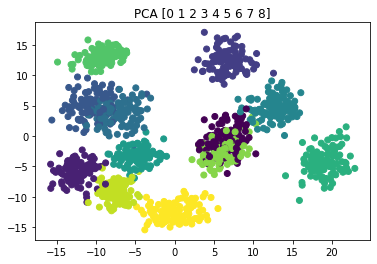

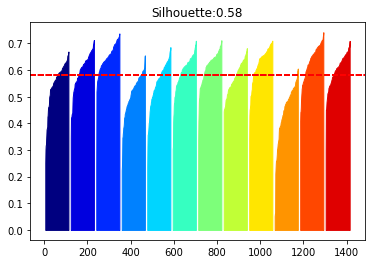

COV 0.7 
ARI  1.0, std 6


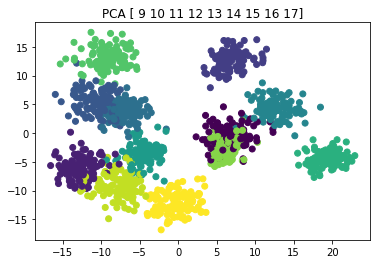

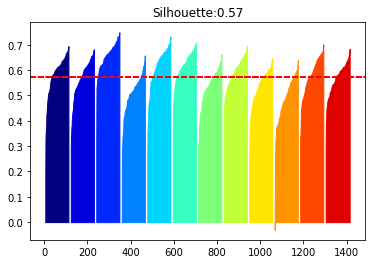

COV 0.7 
ARI  1.0, std 6


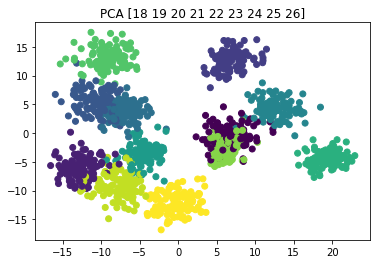

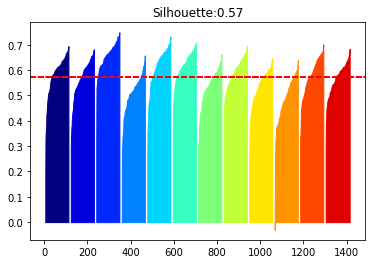

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.11 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.38 sec
KNN computation 0.01 sec
Sorting and thresholds 0.01 sec
Performing hierarchical clustering...
Hierarchical clustering 0.04 sec
Handle redundant features 0.01 sec
Returning 0 redundant features and  8 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 8
adding 50 random population


 19%|█▉        | 4/21 [00:56<03:54, 13.79s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.07,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[8, 0, 7, 0, 5, 10, 3, 6, 10, 10, 8, 4, 4, 7, ...",0.26,0.070857,0.47,24.0,"Counter({6: 112, 8: 108, 0: 108, 7: 108, 5: 10..."


adding 38 random population


 38%|███▊      | 8/21 [04:29<06:35, 30.42s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.07,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[8, 0, 7, 0, 5, 10, 3, 6, 10, 10, 8, 4, 4, 7, ...",0.26,0.070857,0.47,24.0,"Counter({6: 112, 8: 108, 0: 108, 7: 108, 5: 10..."
1,0.05,"[38, 142]","[9, 4, 3, 4, 4, 5, 7, 8, 10, 3, 3, 6, 9, 9, 6,...",0.11,0.076482,0.37,2.0,"Counter({6: 142, 5: 138, 0: 123, 3: 122, 1: 11..."


adding 4 random population


 57%|█████▋    | 12/21 [05:28<02:39, 17.67s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.07,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[8, 0, 7, 0, 5, 10, 3, 6, 10, 10, 8, 4, 4, 7, ...",0.26,0.070857,0.47,24.0,"Counter({6: 112, 8: 108, 0: 108, 7: 108, 5: 10..."
1,0.05,"[38, 142]","[9, 4, 3, 4, 4, 5, 7, 8, 10, 3, 3, 6, 9, 9, 6,...",0.11,0.076482,0.37,2.0,"Counter({6: 142, 5: 138, 0: 123, 3: 122, 1: 11..."
2,0.06,"[13, 21, 22]","[4, 4, 10, 11, 9, 6, 1, 2, 2, 6, 4, 5, 5, 10, ...",0.09,0.076576,0.34,3.0,"Counter({1: 190, 11: 141, 10: 140, 6: 128, 4: ..."


adding 1 random population


 76%|███████▌  | 16/21 [06:31<01:14, 15.00s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.07,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[8, 0, 7, 0, 5, 10, 3, 6, 10, 10, 8, 4, 4, 7, ...",0.26,0.070857,0.47,24.0,"Counter({6: 112, 8: 108, 0: 108, 7: 108, 5: 10..."
1,0.05,"[38, 142]","[9, 4, 3, 4, 4, 5, 7, 8, 10, 3, 3, 6, 9, 9, 6,...",0.11,0.076482,0.37,2.0,"Counter({6: 142, 5: 138, 0: 123, 3: 122, 1: 11..."
2,0.06,"[13, 21, 22]","[4, 4, 10, 11, 9, 6, 1, 2, 2, 6, 4, 5, 5, 10, ...",0.09,0.076576,0.34,3.0,"Counter({1: 190, 11: 141, 10: 140, 6: 128, 4: ..."
3,0.05,"[61, 105]","[2, 0, 5, 1, 2, 10, 7, 3, 5, 10, 5, 7, 7, 8, 1...",0.11,0.076423,0.35,2.0,"Counter({2: 133, 5: 129, 1: 124, 10: 115, 4: 1..."


adding 4 random population


 95%|█████████▌| 20/21 [07:28<00:13, 13.92s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.07,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[8, 0, 7, 0, 5, 10, 3, 6, 10, 10, 8, 4, 4, 7, ...",0.26,0.070857,0.47,24.0,"Counter({6: 112, 8: 108, 0: 108, 7: 108, 5: 10..."
1,0.05,"[38, 142]","[9, 4, 3, 4, 4, 5, 7, 8, 10, 3, 3, 6, 9, 9, 6,...",0.11,0.076482,0.37,2.0,"Counter({6: 142, 5: 138, 0: 123, 3: 122, 1: 11..."
2,0.06,"[13, 21, 22]","[4, 4, 10, 11, 9, 6, 1, 2, 2, 6, 4, 5, 5, 10, ...",0.09,0.076576,0.34,3.0,"Counter({1: 190, 11: 141, 10: 140, 6: 128, 4: ..."
3,0.05,"[61, 105]","[2, 0, 5, 1, 2, 10, 7, 3, 5, 10, 5, 7, 7, 8, 1...",0.11,0.076423,0.35,2.0,"Counter({2: 133, 5: 129, 1: 124, 10: 115, 4: 1..."
4,0.05,"[123, 162]","[1, 6, 2, 8, 7, 8, 2, 3, 2, 6, 9, 8, 4, 3, 10,...",0.12,0.076267,0.35,2.0,"Counter({1: 154, 4: 144, 2: 141, 10: 121, 6: 1..."


adding 3 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 8
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:57<04:03, 14.33s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."


adding 45 random population


 38%|███▊      | 8/21 [04:25<06:39, 30.73s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."
1,0.05,"[13, 22, 24, 147, 272]","[10, 4, 2, 1, 5, 8, 6, 3, 8, 8, 4, 10, 10, 9, ...",0.10,0.23,5.0,"Counter({2: 157, 1: 142, 9: 137, 6: 133, 3: 11..."


adding 5 random population


 57%|█████▋    | 12/21 [05:42<03:02, 20.33s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."
1,0.05,"[13, 22, 24, 147, 272]","[10, 4, 2, 1, 5, 8, 6, 3, 8, 8, 4, 10, 10, 9, ...",0.10,0.23,5.0,"Counter({2: 157, 1: 142, 9: 137, 6: 133, 3: 11..."
2,0.05,"[28, 35, 152, 174, 328]","[4, 5, 2, 5, 4, 6, 5, 6, 11, 0, 7, 3, 6, 7, 6,...",0.11,0.17,5.0,"Counter({8: 160, 0: 138, 11: 136, 5: 123, 9: 1..."


adding 3 random population


 76%|███████▌  | 16/21 [07:08<01:35, 19.07s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."
1,0.05,"[13, 22, 24, 147, 272]","[10, 4, 2, 1, 5, 8, 6, 3, 8, 8, 4, 10, 10, 9, ...",0.10,0.23,5.0,"Counter({2: 157, 1: 142, 9: 137, 6: 133, 3: 11..."
2,0.05,"[28, 35, 152, 174, 328]","[4, 5, 2, 5, 4, 6, 5, 6, 11, 0, 7, 3, 6, 7, 6,...",0.11,0.17,5.0,"Counter({8: 160, 0: 138, 11: 136, 5: 123, 9: 1..."
3,0.05,"[36, 42, 70, 140, 327]","[1, 9, 2, 8, 2, 6, 2, 8, 2, 5, 5, 9, 3, 2, 2, ...",0.11,0.17,5.0,"Counter({9: 153, 2: 143, 1: 135, 0: 131, 8: 12..."


adding 2 random population


 95%|█████████▌| 20/21 [08:40<00:19, 19.23s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."
1,0.05,"[13, 22, 24, 147, 272]","[10, 4, 2, 1, 5, 8, 6, 3, 8, 8, 4, 10, 10, 9, ...",0.10,0.23,5.0,"Counter({2: 157, 1: 142, 9: 137, 6: 133, 3: 11..."
2,0.05,"[28, 35, 152, 174, 328]","[4, 5, 2, 5, 4, 6, 5, 6, 11, 0, 7, 3, 6, 7, 6,...",0.11,0.17,5.0,"Counter({8: 160, 0: 138, 11: 136, 5: 123, 9: 1..."
3,0.05,"[36, 42, 70, 140, 327]","[1, 9, 2, 8, 2, 6, 2, 8, 2, 5, 5, 9, 3, 2, 2, ...",0.11,0.17,5.0,"Counter({9: 153, 2: 143, 1: 135, 0: 131, 8: 12..."
4,0.05,"[17, 60, 83, 135, 330]","[4, 9, 8, 2, 1, 6, 6, 5, 11, 11, 5, 4, 10, 1, ...",0.11,0.18,5.0,"Counter({9: 142, 5: 140, 7: 139, 2: 122, 6: 12..."


adding 7 random population


100%|██████████| 21/21 [09:29<00:00, 27.12s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.06,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[2, 0, 1, 0, 11, 9, 5, 4, 9, 9, 2, 8, 8, 1, 5,...",0.21,0.31,27.0,"Counter({4: 112, 2: 108, 0: 108, 1: 108, 11: 1..."
1,0.05,"[13, 22, 24, 147, 272]","[10, 4, 2, 1, 5, 8, 6, 3, 8, 8, 4, 10, 10, 9, ...",0.10,0.23,5.0,"Counter({2: 157, 1: 142, 9: 137, 6: 133, 3: 11..."
2,0.05,"[28, 35, 152, 174, 328]","[4, 5, 2, 5, 4, 6, 5, 6, 11, 0, 7, 3, 6, 7, 6,...",0.11,0.17,5.0,"Counter({8: 160, 0: 138, 11: 136, 5: 123, 9: 1..."
3,0.05,"[36, 42, 70, 140, 327]","[1, 9, 2, 8, 2, 6, 2, 8, 2, 5, 5, 9, 3, 2, 2, ...",0.11,0.17,5.0,"Counter({9: 153, 2: 143, 1: 135, 0: 131, 8: 12..."
4,0.05,"[17, 60, 83, 135, 330]","[4, 9, 8, 2, 1, 6, 6, 5, 11, 11, 5, 4, 10, 1, ...",0.11,0.18,5.0,"Counter({9: 142, 5: 140, 7: 139, 2: 122, 6: 12..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 8
adding 50 random population


 19%|█▉        | 4/21 [02:06<08:16, 29.22s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.05,"[16, 50]","[0, 0, 2, 0, 4, 3, 4, 6, 3, 0, 4, 8, 8, 5, 0, ...",0.12,0.42,2.0,"Counter({0: 219, 4: 168, 3: 141, 9: 120, 1: 11..."


adding 2 random population


 38%|███▊      | 8/21 [03:57<05:47, 26.72s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.05,"[16, 50]","[0, 0, 2, 0, 4, 3, 4, 6, 3, 0, 4, 8, 8, 5, 0, ...",0.12,0.42,2.0,"Counter({0: 219, 4: 168, 3: 141, 9: 120, 1: 11..."
1,0.07,"[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[2, 0, 5, 0, 10, 6, 9, 1, 6, 6, 2, 4, 4, 5, 9,...",0.22,0.55,14.0,"Counter({1: 112, 2: 108, 0: 108, 5: 108, 10: 1..."


adding 22 random population


 57%|█████▋    | 12/21 [06:52<04:51, 32.44s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.05,"[16, 50]","[0, 0, 2, 0, 4, 3, 4, 6, 3, 0, 4, 8, 8, 5, 0, ...",0.12,0.42,2.0,"Counter({0: 219, 4: 168, 3: 141, 9: 120, 1: 11..."
1,0.07,"[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[2, 0, 5, 0, 10, 6, 9, 1, 6, 6, 2, 4, 4, 5, 9,...",0.22,0.55,14.0,"Counter({1: 112, 2: 108, 0: 108, 5: 108, 10: 1..."
2,0.05,"[25, 158]","[6, 1, 2, 1, 7, 0, 0, 8, 0, 7, 0, 10, 5, 3, 6,...",0.11,0.40,2.0,"Counter({6: 167, 1: 134, 7: 121, 5: 116, 0: 11..."


adding 9 random population


 76%|███████▌  | 16/21 [08:42<02:16, 27.32s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.05,"[16, 50]","[0, 0, 2, 0, 4, 3, 4, 6, 3, 0, 4, 8, 8, 5, 0, ...",0.12,0.42,2.0,"Counter({0: 219, 4: 168, 3: 141, 9: 120, 1: 11..."
1,0.07,"[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[2, 0, 5, 0, 10, 6, 9, 1, 6, 6, 2, 4, 4, 5, 9,...",0.22,0.55,14.0,"Counter({1: 112, 2: 108, 0: 108, 5: 108, 10: 1..."
2,0.05,"[25, 158]","[6, 1, 2, 1, 7, 0, 0, 8, 0, 7, 0, 10, 5, 3, 6,...",0.11,0.40,2.0,"Counter({6: 167, 1: 134, 7: 121, 5: 116, 0: 11..."
3,0.05,"[31, 61]","[3, 8, 10, 5, 7, 1, 4, 8, 5, 1, 10, 6, 3, 4, 8...",0.11,0.38,2.0,"Counter({0: 130, 9: 130, 2: 121, 3: 119, 4: 11..."


adding 3 random population


 95%|█████████▌| 20/21 [10:32<00:25, 25.98s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.05,"[16, 50]","[0, 0, 2, 0, 4, 3, 4, 6, 3, 0, 4, 8, 8, 5, 0, ...",0.12,0.42,2.0,"Counter({0: 219, 4: 168, 3: 141, 9: 120, 1: 11..."
1,0.07,"[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[2, 0, 5, 0, 10, 6, 9, 1, 6, 6, 2, 4, 4, 5, 9,...",0.22,0.55,14.0,"Counter({1: 112, 2: 108, 0: 108, 5: 108, 10: 1..."
2,0.05,"[25, 158]","[6, 1, 2, 1, 7, 0, 0, 8, 0, 7, 0, 10, 5, 3, 6,...",0.11,0.40,2.0,"Counter({6: 167, 1: 134, 7: 121, 5: 116, 0: 11..."
3,0.05,"[31, 61]","[3, 8, 10, 5, 7, 1, 4, 8, 5, 1, 10, 6, 3, 4, 8...",0.11,0.38,2.0,"Counter({0: 130, 9: 130, 2: 121, 3: 119, 4: 11..."
4,0.05,"[105, 171]","[0, 0, 1, 7, 0, 8, 0, 6, 9, 6, 4, 10, 4, 1, 2,...",0.11,0.37,2.0,"Counter({8: 148, 1: 141, 4: 136, 2: 118, 0: 11..."


adding 2 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 8
adding 50 random population


 19%|█▉        | 4/21 [01:44<07:10, 25.32s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.07,0.51783,"[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[7, 0, 2, 0, 4, 9, 10, 8, 9, 9, 7, 6, 6, 2, 10...",0.22,0.55,15.0,"Counter({8: 112, 7: 108, 0: 108, 2: 108, 4: 10..."


adding 15 random population


 38%|███▊      | 8/21 [05:03<07:32, 34.84s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.07,0.517830,"[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[7, 0, 2, 0, 4, 9, 10, 8, 9, 9, 7, 6, 6, 2, 10...",0.22,0.55,15.0,"Counter({8: 112, 7: 108, 0: 108, 2: 108, 4: 10..."
1,0.06,0.357809,"[16, 25]","[0, 9, 6, 0, 5, 5, 5, 11, 5, 9, 0, 3, 10, 8, 9...",0.13,0.54,2.0,"Counter({9: 220, 0: 167, 5: 148, 10: 144, 6: 1..."


adding 6 random population


 57%|█████▋    | 12/21 [06:49<04:06, 27.36s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.07,0.517830,"[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[7, 0, 2, 0, 4, 9, 10, 8, 9, 9, 7, 6, 6, 2, 10...",0.22,0.55,15.0,"Counter({8: 112, 7: 108, 0: 108, 2: 108, 4: 10..."
1,0.06,0.357809,"[16, 25]","[0, 9, 6, 0, 5, 5, 5, 11, 5, 9, 0, 3, 10, 8, 9...",0.13,0.54,2.0,"Counter({9: 220, 0: 167, 5: 148, 10: 144, 6: 1..."
2,0.05,0.350373,"[13, 22]","[3, 4, 1, 10, 5, 8, 11, 6, 8, 2, 11, 7, 11, 4,...",0.09,0.53,2.0,"Counter({1: 197, 10: 161, 11: 145, 4: 141, 7: ..."


adding 1 random population


 76%|███████▌  | 16/21 [08:31<02:03, 24.68s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.07,0.517830,"[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[7, 0, 2, 0, 4, 9, 10, 8, 9, 9, 7, 6, 6, 2, 10...",0.22,0.55,15.0,"Counter({8: 112, 7: 108, 0: 108, 2: 108, 4: 10..."
1,0.06,0.357809,"[16, 25]","[0, 9, 6, 0, 5, 5, 5, 11, 5, 9, 0, 3, 10, 8, 9...",0.13,0.54,2.0,"Counter({9: 220, 0: 167, 5: 148, 10: 144, 6: 1..."
2,0.05,0.350373,"[13, 22]","[3, 4, 1, 10, 5, 8, 11, 6, 8, 2, 11, 7, 11, 4,...",0.09,0.53,2.0,"Counter({1: 197, 10: 161, 11: 145, 4: 141, 7: ..."
3,0.05,0.247672,"[79, 91]","[0, 5, 2, 2, 7, 5, 7, 3, 0, 11, 1, 11, 4, 3, 6...",0.12,0.37,2.0,"Counter({1: 156, 3: 135, 6: 135, 0: 116, 5: 11..."


adding 1 random population


 95%|█████████▌| 20/21 [10:12<00:23, 23.17s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.07,0.517830,"[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[7, 0, 2, 0, 4, 9, 10, 8, 9, 9, 7, 6, 6, 2, 10...",0.22,0.55,15.0,"Counter({8: 112, 7: 108, 0: 108, 2: 108, 4: 10..."
1,0.06,0.357809,"[16, 25]","[0, 9, 6, 0, 5, 5, 5, 11, 5, 9, 0, 3, 10, 8, 9...",0.13,0.54,2.0,"Counter({9: 220, 0: 167, 5: 148, 10: 144, 6: 1..."
2,0.05,0.350373,"[13, 22]","[3, 4, 1, 10, 5, 8, 11, 6, 8, 2, 11, 7, 11, 4,...",0.09,0.53,2.0,"Counter({1: 197, 10: 161, 11: 145, 4: 141, 7: ..."
3,0.05,0.247672,"[79, 91]","[0, 5, 2, 2, 7, 5, 7, 3, 0, 11, 1, 11, 4, 3, 6...",0.12,0.37,2.0,"Counter({1: 156, 3: 135, 6: 135, 0: 116, 5: 11..."
4,0.06,0.376024,"[3, 8, 11, 18, 26, 329]","[7, 0, 11, 0, 8, 5, 4, 6, 5, 5, 7, 2, 2, 11, 4...",0.14,0.44,6.0,"Counter({5: 215, 6: 112, 0: 109, 7: 108, 11: 1..."


adding 11 random population


100%|██████████| 21/21 [12:14<00:00, 34.98s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,gmm_ratkowsky_lance_12_pop2,0,0,0.888889,0.320000,16,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...",[8],1.0,1.0,12,12
1,gmm_ratkowsky_lance_12_pop2,1,0,0.888889,0.320000,16,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...",[13],1.0,1.0,12,12
2,gmm_ratkowsky_lance_12_pop2,2,0,0.777778,0.269231,17,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15...","[21, 22]",1.0,1.0,12,12
3,gmm_adapted_ratkowsky_lance_12_pop2,0,0,1.000000,0.333333,18,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...",[],1.0,1.0,12,12
4,gmm_adapted_ratkowsky_lance_12_pop2,1,0,0.666667,0.200000,21,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[12, 13, 17]",1.0,1.0,12,12
5,gmm_adapted_ratkowsky_lance_12_pop2,2,0,0.777778,0.241379,20,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...","[22, 24]",1.0,1.0,12,12
6,gmm_silhouette_12_pop3,0,1,0.777778,0.437500,7,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[3, 4]",1.0,1.0,12,12
7,gmm_silhouette_12_pop3,1,1,0.444444,0.210526,10,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[9, 12, 13, 15, 16]",1.0,1.0,12,12
8,gmm_silhouette_12_pop3,2,1,0.333333,0.150000,11,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 1, 2, 5, 6, 7, 8, 10, 11, 14, 17, 18, 20, 26]","[19, 21, 22, 23, 24, 25]",1.0,1.0,12,12
9,gmm_adapted_silhouette_12_pop3,0,0,0.666667,0.333333,9,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 17, 20, 21, ...","[3, 6, 8]",1.0,1.0,12,12


>> std 3
generating ../data/GA/nonisotropic_GA_gmm_3_3.pkl ...
COV 0.4 
ARI  1.0, std 3


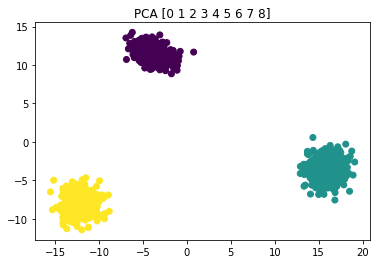

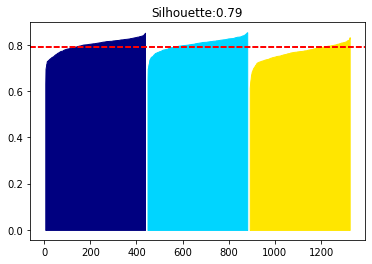

COV 0.4 
ARI  1.0, std 3


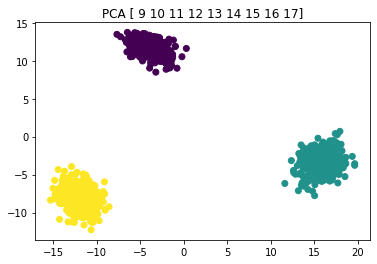

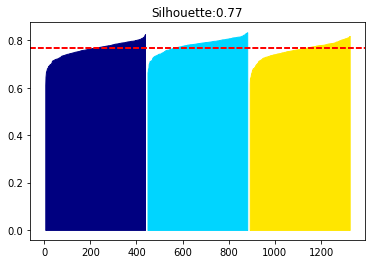

COV 0.4 
ARI  1.0, std 3


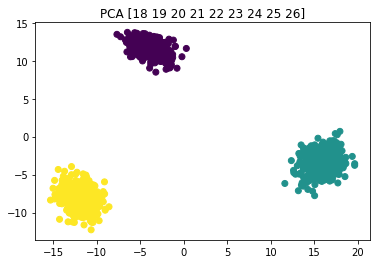

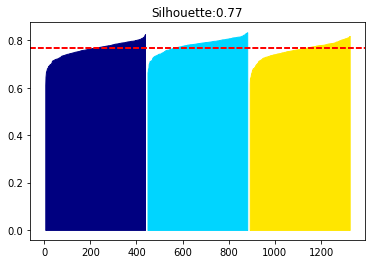

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.19 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.36 sec
KNN computation 0.02 sec
Sorting and thresholds 0.01 sec
Performing hierarchical clustering...
Hierarchical clustering 0.04 sec
Handle redundant features 0.01 sec
Returning 0 redundant features and  19 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 19
adding 50 random population


 19%|█▉        | 4/21 [00:29<02:15,  7.97s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.29,"[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.31672,0.81,13.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 50 random population


 38%|███▊      | 8/21 [01:23<02:02,  9.43s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.29,"[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.316720,0.81,13.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.21,"[13, 22]","[1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, ...",0.19,0.311927,0.61,2.0,"Counter({0: 475, 1: 433, 2: 392})"


adding 19 random population


 57%|█████▋    | 12/21 [01:46<00:57,  6.43s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.29,"[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.316720,0.81,13.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.21,"[13, 22]","[1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, ...",0.19,0.311927,0.61,2.0,"Counter({0: 475, 1: 433, 2: 392})"
2,0.21,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, ...",0.22,0.313179,0.64,2.0,"Counter({2: 446, 1: 433, 0: 421})"


adding 22 random population


 76%|███████▌  | 16/21 [02:08<00:26,  5.38s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.29,"[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.316720,0.81,13.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.21,"[13, 22]","[1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, ...",0.19,0.311927,0.61,2.0,"Counter({0: 475, 1: 433, 2: 392})"
2,0.21,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, ...",0.22,0.313179,0.64,2.0,"Counter({2: 446, 1: 433, 0: 421})"
3,0.25,"[0, 3, 6, 9, 18, 21]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.30,0.286850,0.63,6.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 28 random population


 95%|█████████▌| 20/21 [02:44<00:06,  6.67s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.29,"[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.316720,0.81,13.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.21,"[13, 22]","[1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, ...",0.19,0.311927,0.61,2.0,"Counter({0: 475, 1: 433, 2: 392})"
2,0.21,"[15, 24]","[2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, ...",0.22,0.313179,0.64,2.0,"Counter({2: 446, 1: 433, 0: 421})"
3,0.25,"[0, 3, 6, 9, 18, 21]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.30,0.286850,0.63,6.0,"Counter({0: 434, 1: 433, 2: 433})"
4,0.14,"[95, 131]","[0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, ...",0.15,0.205277,0.39,2.0,"Counter({1: 494, 2: 405, 0: 401})"


adding 1 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 19
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:29<02:18,  8.15s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 50 random population


 38%|███▊      | 8/21 [02:15<03:28, 16.05s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"


adding 2 random population


 57%|█████▋    | 12/21 [02:46<01:24,  9.34s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
2,0.16,"[33, 331]","[2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, ...",0.16,0.41,2.0,"Counter({2: 487, 1: 427, 0: 386})"


adding 7 random population


 76%|███████▌  | 16/21 [03:11<00:34,  6.88s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
2,0.16,"[33, 331]","[2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, ...",0.16,0.41,2.0,"Counter({2: 487, 1: 427, 0: 386})"
3,0.18,"[10, 19]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, ...",0.10,0.52,2.0,"Counter({2: 664, 0: 382, 1: 254})"


adding 10 random population


 95%|█████████▌| 20/21 [03:39<00:06,  6.44s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
2,0.16,"[33, 331]","[2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, ...",0.16,0.41,2.0,"Counter({2: 487, 1: 427, 0: 386})"
3,0.18,"[10, 19]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, ...",0.10,0.52,2.0,"Counter({2: 664, 0: 382, 1: 254})"
4,0.14,"[36, 141]","[1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, ...",0.14,0.39,2.0,"Counter({0: 482, 1: 428, 2: 390})"


adding 8 random population


100%|██████████| 21/21 [03:48<00:00, 10.86s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.82,0.75,25.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.18,"[232, 327]","[0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, ...",0.09,0.51,2.0,"Counter({2: 579, 0: 381, 1: 340})"
2,0.16,"[33, 331]","[2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, ...",0.16,0.41,2.0,"Counter({2: 487, 1: 427, 0: 386})"
3,0.18,"[10, 19]","[1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, ...",0.10,0.52,2.0,"Counter({2: 664, 0: 382, 1: 254})"
4,0.14,"[36, 141]","[1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, ...",0.14,0.39,2.0,"Counter({0: 482, 1: 428, 2: 390})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 19
adding 50 random population


 19%|█▉        | 4/21 [01:12<05:03, 17.87s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[7, 14, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.44,0.86,4.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 31 random population


 38%|███▊      | 8/21 [04:01<07:15, 33.51s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[7, 14, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.44,0.86,4.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.24,"[8, 16, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.39,0.86,3.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 40 random population


 57%|█████▋    | 12/21 [05:40<03:42, 24.71s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[7, 14, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.44,0.86,4.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.24,"[8, 16, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.39,0.86,3.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.26,"[2, 5, 15, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.40,0.77,5.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 45 random population


 76%|███████▌  | 16/21 [07:10<01:43, 20.68s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[7, 14, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.44,0.86,4.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.24,"[8, 16, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.39,0.86,3.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.26,"[2, 5, 15, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.40,0.77,5.0,"Counter({0: 434, 1: 433, 2: 433})"
3,0.24,"[3, 4, 6, 20]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.29,0.73,4.0,"Counter({0: 434, 2: 433, 1: 433})"


adding 23 random population


 95%|█████████▌| 20/21 [08:33<00:18, 18.81s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[7, 14, 17, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.44,0.86,4.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.24,"[8, 16, 25]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.39,0.86,3.0,"Counter({0: 434, 1: 433, 2: 433})"
2,0.26,"[2, 5, 15, 23, 24]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.40,0.77,5.0,"Counter({0: 434, 1: 433, 2: 433})"
3,0.24,"[3, 4, 6, 20]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.29,0.73,4.0,"Counter({0: 434, 2: 433, 1: 433})"
4,0.20,"[11, 22]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.19,0.69,2.0,"Counter({2: 434, 0: 434, 1: 432})"


adding 14 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 19
adding 50 random population


 19%|█▉        | 4/21 [01:14<05:12, 18.40s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.29,0.741023,"[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.8,0.78,21.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 50 random population


 38%|███▊      | 8/21 [03:23<05:05, 23.51s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.29,0.741023,"[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.80,0.78,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.17,0.291145,"[84, 330]","[1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, ...",0.16,0.44,2.0,"Counter({1: 527, 0: 413, 2: 360})"


adding 2 random population


 57%|█████▋    | 12/21 [04:44<02:53, 19.26s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.29,0.741023,"[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.80,0.78,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.17,0.291145,"[84, 330]","[1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, ...",0.16,0.44,2.0,"Counter({1: 527, 0: 413, 2: 360})"
2,0.22,0.436457,"[0, 9, 18]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.21,0.58,3.0,"Counter({1: 438, 0: 435, 2: 427})"


adding 21 random population


 76%|███████▌  | 16/21 [06:11<01:34, 18.96s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.29,0.741023,"[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.80,0.78,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.17,0.291145,"[84, 330]","[1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, ...",0.16,0.44,2.0,"Counter({1: 527, 0: 413, 2: 360})"
2,0.22,0.436457,"[0, 9, 18]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.21,0.58,3.0,"Counter({1: 438, 0: 435, 2: 427})"
3,0.10,0.280208,"[124, 323]","[0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, ...",0.14,0.42,2.0,"Counter({2: 468, 0: 451, 1: 381})"


adding 2 random population


 95%|█████████▌| 20/21 [07:23<00:17, 17.19s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.29,0.741023,"[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.80,0.78,21.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.17,0.291145,"[84, 330]","[1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, ...",0.16,0.44,2.0,"Counter({1: 527, 0: 413, 2: 360})"
2,0.22,0.436457,"[0, 9, 18]","[2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, ...",0.21,0.58,3.0,"Counter({1: 438, 0: 435, 2: 427})"
3,0.10,0.280208,"[124, 323]","[0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, ...",0.14,0.42,2.0,"Counter({2: 468, 0: 451, 1: 381})"
4,0.10,0.273426,"[51, 254]","[1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, ...",0.13,0.41,2.0,"Counter({1: 514, 0: 396, 2: 390})"


adding 4 random population


100%|██████████| 21/21 [07:49<00:00, 22.36s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,gmm_ratkowsky_lance_3_pop2,0,0,0.555556,0.294118,8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[0, 1, 3, 6]",1.0,1.0,3,3
1,gmm_ratkowsky_lance_3_pop2,1,0,0.444444,0.222222,9,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[9, 10, 12, 13, 15]",1.0,1.0,3,3
2,gmm_ratkowsky_lance_3_pop2,2,0,0.444444,0.222222,9,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 4, 5, 7, 8, 11, 14, 16, 17, 20, 23, 25, 26]","[18, 19, 21, 22, 24]",1.0,1.0,3,3
3,gmm_adapted_ratkowsky_lance_3_pop2,0,0,1.000000,0.360000,16,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",[],1.0,1.0,3,3
4,gmm_adapted_ratkowsky_lance_3_pop2,1,0,0.888889,0.307692,17,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",[10],1.0,1.0,3,3
5,gmm_adapted_ratkowsky_lance_3_pop2,2,0,0.888889,0.307692,17,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",[19],1.0,1.0,3,3
6,gmm_silhouette_3_pop3,0,3,0.333333,0.300000,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[3, 4, 6, 20]","[0, 1, 2, 5, 7, 8]",1.0,1.0,3,3
7,gmm_silhouette_3_pop3,1,0,0.222222,0.181818,2,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[7, 14, 17, 26]","[9, 10, 11, 12, 13, 15, 16]",1.0,1.0,3,3
8,gmm_silhouette_3_pop3,2,2,0.222222,0.166667,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 5, 15, 23, 24]","[18, 19, 20, 21, 22, 25, 26]",1.0,1.0,3,3
9,gmm_adapted_silhouette_3_pop3,0,0,0.777778,0.304348,14,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[0, 1]",1.0,1.0,3,3


../data/GA/nonisotropic_GA_gmm_3_6.pkl exists!
../data/GA/nonisotropic_GA_gmm_3_12.pkl exists!
>> std 1
../data/GA/nonisotropic_GA_gmm_1_3.pkl exists!
../data/GA/nonisotropic_GA_gmm_1_6.pkl exists!
../data/GA/nonisotropic_GA_gmm_1_12.pkl exists!


In [10]:

for std in [6, 3, 1]:
    print(f">> std {std}")
    n_clusters_per_subpace = [3,6,12]
    cluster_std = None
    n_uniform_features=700
    n_normal_features=700
    n_neg_binomial = 700
    n_gamma = 500
    n_redundant_clusters = 0
    n_redundant_cluster_size = 0
    for n_clusters in np.unique(n_clusters_per_subpace): 
        if os.path.isfile(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl"):
            print(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl exists!")
            continue
        print(f"generating ../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl ...")
            

        n_redundant_clusters = 0
        n_redundant_cluster_size = 0
        data, best_subspaces, truths = data_generator.make_data_for_ga(
                         [n_clusters, n_clusters, n_clusters],
                         cluster_std=[std, std,std],
                         n_uniform_features=150,
                         n_normal_features=150,
                         n_neg_binomial=0,
                         n_gamma=0,
                         n_beta=0,
                         random_redundant=True,
                         n_redundant=5,
                         n_outlier_features=0,
                         n_cutoff=0,
                         n_bimodal_features=0,
                         min_subspace_features=9,
                         max_subspace_features=10,
                         max_neg_bin_p = 0.3,
                         n_samples=1300,
                         plot=True,
                         isotropic = False)

        imp_f = np.concatenate(best_subspaces)
        data.shape, imp_f, best_subspaces

        truth = None

        clustering ="gmm"

        meta_features = feature_ranking.rank_features(data,
                                                      nb_bins=20,
                                                      rank_threshold=90,
                                                      z_file=None,
                                                      metric='euclidean',
                                                      redundant_threshold=0.4)
    
#         model_file = f'../models/gmm_arl.h5' 
#         population2, n = features_2d.run(
#             data,
#             n_clusters,
#             meta_features,
#             model_file=model_file,
#             add_close_population=False,
#             theta=0.09,
#         )

        globalResults = {}

        ############## ratkowsky_lance #######################
        method = "ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
        "ARCHIVE2D": { 
            "ga": 0,
            "max": 0 },
        "CLOSE": { 
            "ga": 0.35,
            "max": 0.35 },
        "IMP1D": { 
            "ga": 0.35,
            "max": 0.35 },
        "RANDOM": { 
            "ga": 0.3,
            "max": 0.3},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions
        
        ############## adapted_ratkowsky_lance #######################
        method = "adapted_ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
        params

        solutions, archive= ga.run(data, params)
        display(solutions)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions

        ############## silhouette #######################
        method = "silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions

        ############## adapted_silhouette #######################
        method = "adapted_silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions
        eval_df = ga_evaluation.evaluate_ga_result(globalResults, best_subspaces, truths)
        eval_df.to_pickle(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl")
        print(f">> EVAL DF")
        display(eval_df)

In [11]:
df = None
n_clusters_per_subpace = [3,6,12]
# for std in [0.5, 1, 1.5, 2, 3, 4]:
for std in [6, 3, 1]:
    for n_clusters in n_clusters_per_subpace:
        eval_df = pd.read_pickle(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl")
    #     eval_df = pd.read_pickle(f"../data/GA/GA_hdbscan_{std}_20000.pkl")
        eval_df["std"] = std
        if df is None:
            df = eval_df
        else:
            df = pd.concat([df, eval_df])

In [12]:
df.experiment.unique()

array(['gmm_ratkowsky_lance_3_pop2', 'gmm_adapted_ratkowsky_lance_3_pop2',
       'gmm_silhouette_3_pop3', 'gmm_adapted_silhouette_3_pop3',
       'gmm_ratkowsky_lance_6_pop2', 'gmm_adapted_ratkowsky_lance_6_pop2',
       'gmm_silhouette_6_pop3', 'gmm_adapted_silhouette_6_pop3',
       'gmm_ratkowsky_lance_12_pop2',
       'gmm_adapted_ratkowsky_lance_12_pop2', 'gmm_silhouette_12_pop3',
       'gmm_adapted_silhouette_12_pop3'], dtype=object)

In [13]:


columns={
            'Adapted Ratkowsky Lance': "Penalized\nRatkowski Lance",
            'Adapted Silhouette': "Penalized\nSilhouette",
            
        }
df["experiment"] = df["experiment"].apply(
    lambda l: " ".join(x.title() for x in l.split("_")[1:-2]))

df = df.rename(columns = {"ari": "ARI", "%intersect": "% Identified Features",
                         'true_nb_clust' : "Nb Clusters"})
df = df.sort_values(by = "experiment")
# df["experiment"] = df["experiment"].apply(lambda x: columns.get(x, x))

In [14]:
df["experiment"] = df["experiment"].apply(lambda x: columns[x] if x in columns else x)

In [15]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T

experiment,Penalized\nRatkowski Lance,Penalized\nSilhouette,Ratkowsky Lance,Silhouette
% Identified Features,0.930041,0.872428,0.702381,0.473118
ARI,1.000000,1.000000,0.987840,1.000000


In [16]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.mean()

experiment
Penalized\nRatkowski Lance    0.965021
Penalized\nSilhouette         0.936214
Ratkowsky Lance               0.845111
Silhouette                    0.736559
dtype: float64

In [17]:
df.to_pickle("../data/simulated_gmm.pkl")

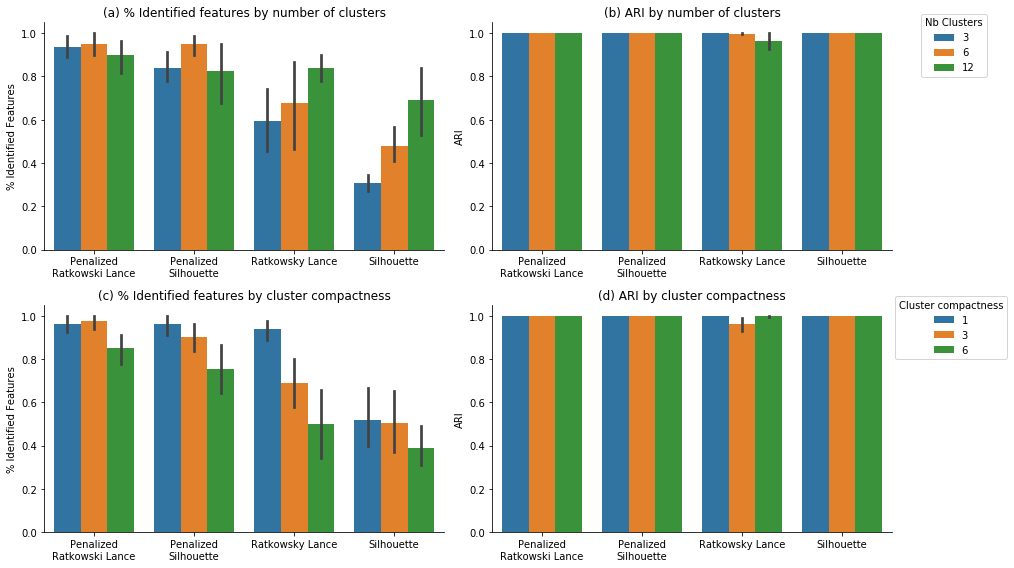

In [18]:
plt.figure(figsize = (14, 8 ))
ax = plt.subplot(221)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.title("(a) % Identified features by number of clusters")
plt.xlabel("")
sns.despine()

ax = plt.subplot(222)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(b) ARI by number of clusters")
sns.despine()


ax = plt.subplot(223)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "std", ax = ax)
g.legend_.remove()
plt.xlabel("")
plt.title("(c) % Identified features by cluster compactness")
sns.despine()

ax = plt.subplot(224)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(d) ARI by cluster compactness")
sns.despine()
plt.tight_layout()
plt.savefig(f"../images/GMM_subspace_clustering.pdf", bbox_inches='tight')

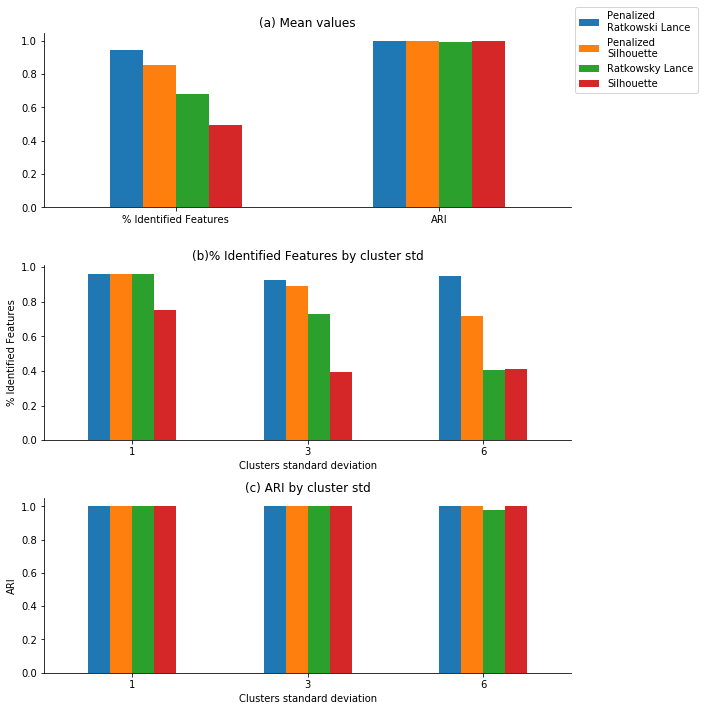

In [18]:
plt.figure(figsize = (10, 10 ))
ax = plt.subplot(311)
g = df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.plot(kind = "bar", ax = ax)
plt.title("(a) Mean values")
plt.xticks(rotation =0 )
sns.despine()
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)


ax = plt.subplot(312)
g = df.groupby(
    ["experiment", "std"]).mean()["% Identified Features"].unstack(1).T.plot(kind="bar", ax = ax)
plt.xticks(rotation =0 )
sns.despine()
g.legend_.remove()
plt.title("(b)% Identified Features by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("% Identified Features")

ax = plt.subplot(313)
g = df.groupby(
    ["experiment", "std"]).mean()["ARI"].unstack(1).T.plot(kind="bar", ax = ax)
sns.despine()
plt.title("(c) ARI by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("ARI")

plt.xticks(rotation =0 )
g.legend_.remove()
plt.tight_layout()
# plt.savefig(f"images/ARI_features_internal_scores_small_dataset_GMM.pdf", bbox_inches='tight')

In [2]:
df1 = pd.read_pickle("../data/simulated_gmm.pkl")
df2 = pd.read_pickle("../data/simulated_hdbscan.pkl")

In [3]:
df1.groupby("experiment").mean()

,% Identified Features,iou,ARI,nmi,std
experiment,,,,,
Penalized\nRatkowski Lance,0.930041,0.298658,1.00000,1.000000,3.333333
Penalized\nSilhouette,0.872428,0.309745,1.00000,1.000000,3.333333
Ratkowsky Lance,0.702381,0.272102,0.98784,0.995341,3.428571
Silhouette,0.473118,0.246367,1.00000,1.000000,3.193548


In [4]:
df2.groupby("experiment").mean()

,% Identified Features,IOU,ARI,nmi,std
experiment,,,,,
Penalized\nRatkowski Lance,0.229469,0.149291,0.308290,0.551897,2.630435
Penalized\nSilhouette,0.818930,0.299758,0.895252,0.930840,3.333333
Ratkowsky Lance,0.212560,0.151022,0.378038,0.607506,2.673913
Silhouette,0.356209,0.200862,0.756970,0.852848,3.441176


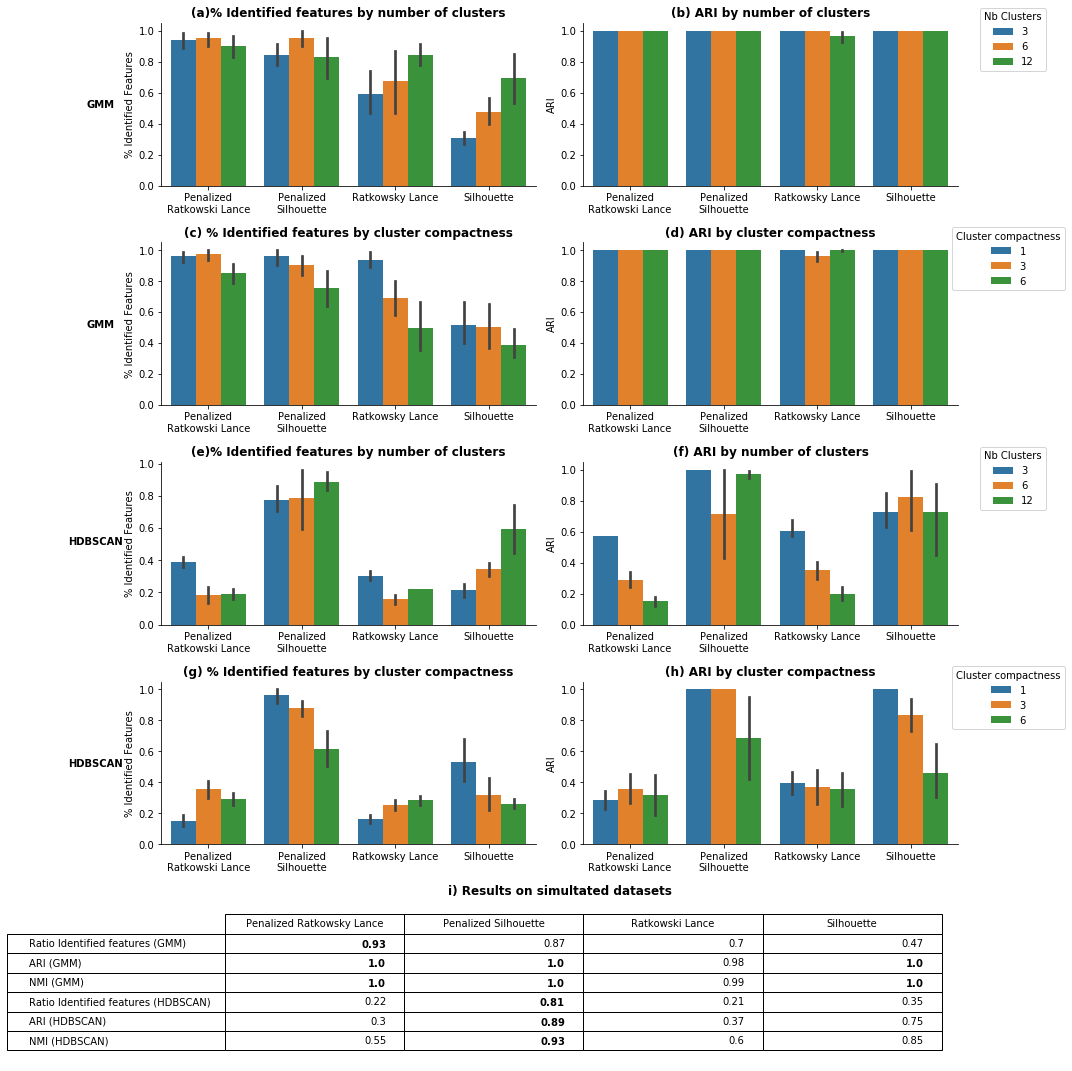

In [27]:
fig = plt.figure(figsize = (14, 15 ))
gs = fig.add_gridspec(5, 2)
# ax = plt.subplot(421)
ax = fig.add_subplot(gs[0,0])
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df1, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.text(-1.3, 0.5, "GMM", fontweight = "bold")
plt.title("(a)% Identified features by number of clusters", fontweight = "bold")
plt.xlabel("")
sns.despine()

# ax = plt.subplot(422)
ax = fig.add_subplot(gs[0,1])
g = sns.barplot(x = "experiment" , y = "ARI", data = df1, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(b) ARI by number of clusters",  fontweight = "bold")
sns.despine()


# ax = plt.subplot(423)
ax = fig.add_subplot(gs[1,0])
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df1, hue = "std", ax = ax)
plt.text(-1.3, 0.5, "GMM", fontweight = "bold")
g.legend_.remove()
plt.xlabel("")
plt.title("(c) % Identified features by cluster compactness", fontweight = "bold")
sns.despine()

# ax = plt.subplot(424)
ax = fig.add_subplot(gs[1,1])
g = sns.barplot(x = "experiment" , y = "ARI", data = df1, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(d) ARI by cluster compactness", fontweight = "bold")
sns.despine()

# ax = plt.subplot(425)
ax = fig.add_subplot(gs[2,0])
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df2, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.text(-1.5, 0.5, "HDBSCAN", fontweight = "bold")
plt.title("(e)% Identified features by number of clusters", fontweight = "bold")
plt.xlabel("")
sns.despine()

# ax = plt.subplot(426)
ax = fig.add_subplot(gs[2,1])
g = sns.barplot(x = "experiment" , y = "ARI", data = df2, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(f) ARI by number of clusters",  fontweight = "bold")
sns.despine()


# ax = plt.subplot(427)
ax = fig.add_subplot(gs[3,0])
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df2, hue = "std", ax = ax)
plt.text(-1.5, 0.5, "HDBSCAN", fontweight = "bold")
g.legend_.remove()
plt.xlabel("")
plt.title("(g) % Identified features by cluster compactness", fontweight = "bold")
sns.despine()

# ax = plt.subplot(428)
ax = fig.add_subplot(gs[3,1])
g = sns.barplot(x = "experiment" , y = "ARI", data = df2, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(h) ARI by cluster compactness", fontweight = "bold")
sns.despine()
# Table values
ax = fig.add_subplot(gs[-1, :])
df = pd.read_excel("../results.xlsx", sheet_name = 3)

df["index"] = df["Measure"] + " ("+ df["Clustering Algorithm"]+ ")"

df = df.drop(["Clustering Algorithm", "Measure"], axis = 1)

df =df.set_index("index", drop = True)
df

numeric_scores = df.values

values = numeric_scores.copy().astype(str)

for i in range(numeric_scores.shape[0]):
    val = np.max(numeric_scores[i])
    for j in np.where(numeric_scores[i] == val)[0]:
        values[ i, j]= "$\\bf{" + str(numeric_scores[ i, j]) +  "}$"
    
ax.axis("off")
table = ax.table(cellText=values,
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center right'
        )
table.scale(0.9, 1.4)
plt.title("i) Results on simultated datasets", fontweight = "bold")
plt.tight_layout()
plt.savefig(f"../images/Simulated_Data.pdf", bbox_inches='tight')

In [11]:
df = pd.read_excel("../results.xlsx", sheet_name = 3)

df["index"] = df["Measure"] + " ("+ df["Clustering Algorithm"]+ ")"

df = df.drop(["Clustering Algorithm", "Measure"], axis = 1)

df =df.set_index("index", drop = True)
df

numeric_scores = df.values

values = numeric_scores.copy().astype(str)

for i in range(numeric_scores.shape[0]):
    j = np.argmax(numeric_scores[i])
    values[ i, j]= "$\\bf{" + str(numeric_scores[ i, j]) +  "}$"

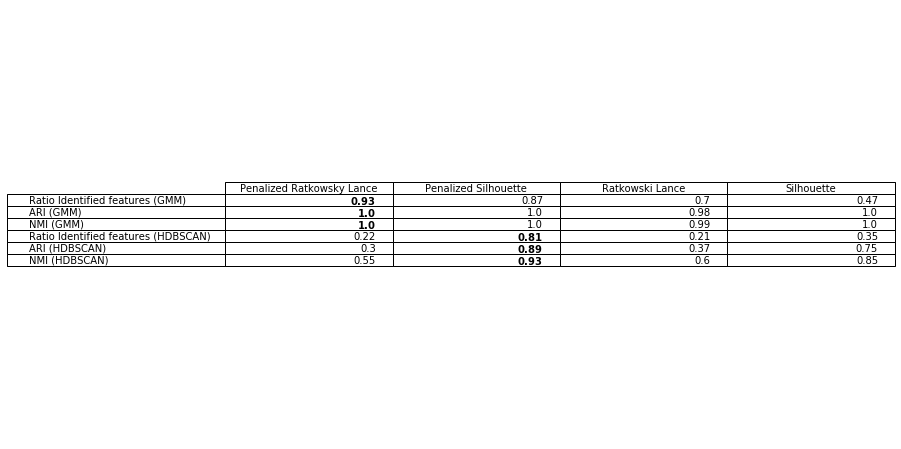

In [21]:
plt.figure(figsize = (12,8))
ax = plt.subplot(1, 1, 1)
ax.axis("off")
table = ax.table(cellText=values,
          rowLabels=df.index,
          colLabels=df.columns,
          loc='center left'
        )